In [3]:
cd ~/git/so-rox-analysis/

/home/sab267/git/so-rox-analysis


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from resistance2temperature import resistance2temperature


%matplotlib inline
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [10, 6]

## BF vs LS Servo from Jan 27 2021 at Yale 
For the sensors for which we cannot obtain a true LS calibration, we apply a fit to the BF temperature measurements; setting up that scene below

In [5]:
bfservo = [50,60,70,80,90,110,110,120,130,140,150,160,170,180,190,200]
lsservo = [52,64,74.6,83.5,92.3,100.8,109.2,118.3,127.3,135.7,144.8,153.7,162.3,170.8,179.5,188.2]
lsbf_slopefit = np.polyfit(bfservo,lsservo,1)
print(lsbf_slopefit)

[0.89409116 9.99229767]


## Princeton Data
### [X-003, X-114, X-129, Yale LS ROX]

In [6]:
x = np.arange(0,225)
standard_curve = '/home/sab267/git/thermometer-calibrations/standard/rox/Rx102aMN.340'

In [7]:
## X-003
x003_pton = [66.2,75.1,83.8,87.9,92.1,96.3,100.3,104.2,108.5,112.7,117.1,121.4,125.7,130.2,134.3,138.9,143.1,147.5,151.8,156.2,160.4,164.8,169,173.3,177.6,186.1,194.6,203.2]
oxford = [58.9,67.8,77.1,81.9,86,90.5,94.9,99.4,104,108,112,116,121,125,129,133,137,141,145,149,153,157,161,165,169,178,186,194]

## X-114 Recal'd
oxford_x114 = [58.9,67.8,77.1,81.9,86,90.5,94.9,99.4,104,108,112,116,121,125,129,133,137,141,145,149,153,157,161,165,169,178,186,194]
x114_pton = [61.2,70.3,80.4,85.6,90.6,95.5,100.6,105.5,110.5,115.4,120.6,125.5,130.5,135.4,140.3,145.5,150.4,155.4,160.4,165.5,170.4,175.5,180.4,185.4,190.5,200.5,210.6,220.4]

## X-114 LS Cal (Pton Michigan DR - 01/25/2021 Cooldown)
x114_res = [39840, 31960, 26190, 23990, 22250, 20720, 19390, 18270, 17260, 16390, 15560, 14860, 14210, 13620, 13110, 12590, 12150, 11730, 11350, 10970, 10650, 10330, 10040, 9760, 9500, 9030, 8600, 8320]
x114_lscalfile = '/home/sab267/git/so-rox-analysis/X-114_LS.cal'
x114_LS_temps = 1000*resistance2temperature(x114_lscalfile, x114_res)

## Yale LS Rox (Pton Michigan DR - 03/17/2021 Cooldown)
oxford_lscal = [52.4,62.03,72.28,83.65,94.34,104.8,115,124,134.1,143.1,152.5,162.7,172,182,191]
ls_cal_pton = [60,70,80,90,100,110,120,130,140,150,160,170,180,190.4,200]

## Yale LS Rox Standard Curve Conversion 
lsrox_res = [33020, 26720, 21910, 18350, 15830, 13970, 12600, 11520, 10630, 9880, 9230, 8670, 8200, 7750, 7380]
lsrox_standardcurve = 1000*resistance2temperature(standard_curve, lsrox_res)

## X-129 (which is only BF calibrated)
x129_pton = [60.5,69.4,79.2,84.2,89,93.8,98.6,103.5,108.3,113,118.1,122.8,127.7,132.5,137.2,142.4,147.2,152,156.9,161.9,166.7,171.8,176.6,181.6,186.5,196.5,207.6,217.2]

## X-129 (LS - through a slope fit)
x129_lstemps = []
for i in range(0, len(x129_pton)):
    lstemps = lsbf_slopefit[0]*x129_pton[i] + lsbf_slopefit[1]
    x129_lstemps.append(lstemps)



### Oxford vs All Calibrations

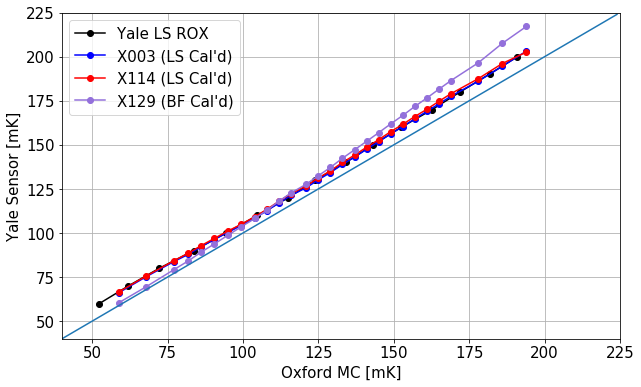

In [10]:
plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Yale LS ROX")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "X003 (LS Cal'd)")
#plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "X114 (BF Inferred)")
plt.plot(oxford_x114, x114_LS_temps, 'o-', color = 'r', label = "X114 (LS Cal'd)")
plt.plot(oxford, x129_pton, 'o-', color = 'mediumpurple', label = "X129 (BF Cal'd)")
#plt.plot(oxford, x129_lstemps, 'o-', color = 'darkkhaki', label = "Princeton: X129 (LS Inferred)")
plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Oxford MC [mK]')
plt.legend()

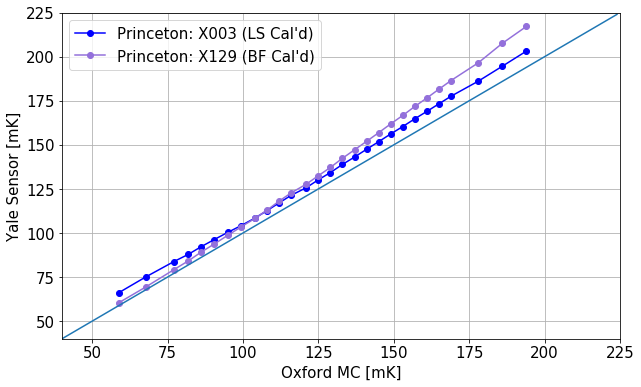

In [9]:
#plt.plot(oxford_lscal, ls_cal_pton, 'o-', color = 'k', label = "Princeton: Yale LS ROX")
plt.plot(oxford,x003_pton, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd)")
#plt.plot(oxford_x114, x114_pton, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd)")
#plt.plot(oxford_x114, x114_LS_temps, 'o-', color = 'r', label = "Princeton: X114 LS Cal")
plt.plot(oxford, x129_pton, 'o-', color = 'mediumpurple', label = "Princeton: X129 (BF Cal'd)")
#plt.plot(oxford, x129_lstemps, 'o-', color = 'darkkhaki', label = "Princeton: X129 (LS Cal'd)")
plt.xlim(40,225)
plt.ylim(40,225)
plt.plot(x,x)
plt.grid()
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Oxford MC [mK]')
plt.legend()

In [11]:
oxford = np.array(oxford)
oxford_x114 = np.array(oxford_x114)
oxford_lscal = np.array(oxford_lscal)
x114_pton = np.array(x114_pton)
x114_LS_temps = np.array(x114_LS_temps)
x003_pton = np.array(x003_pton)
x129_pton = np.array(x129_pton)
x129_lstemps = np.array(x129_lstemps)
ls_cal_pton = np.array(ls_cal_pton)

6.966666666666669


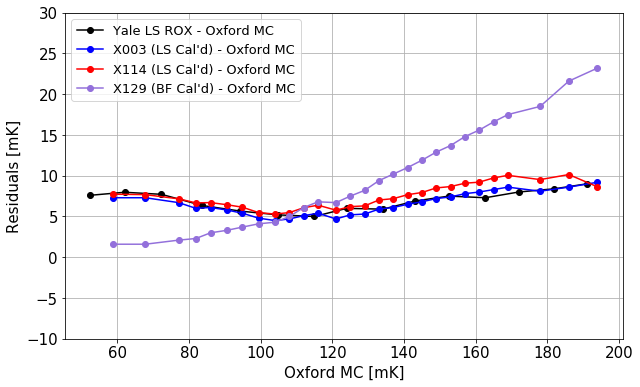

In [13]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o-', color = 'k', label = "Yale LS ROX - Oxford MC")
plt.plot(oxford,x003_pton-oxford, 'o-', color = 'b', label = "X003 (LS Cal'd) - Oxford MC")
#plt.plot(oxford_x114, x114_pton-oxford_x114, 'o-', color = 'c', label = "X114 (BF Inferred) - Oxford MC")
plt.plot(oxford_x114, x114_LS_temps-oxford_x114, 'o-', color = 'r', label = "X114 (LS Cal'd) - Oxford MC")
plt.plot(oxford, x129_pton-oxford, 'o-', color = 'mediumpurple', label = "X129 (BF Cal'd) - Oxford MC")
#plt.plot(oxford, x129_lstemps-oxford, 'o-', color = 'darkkhaki', label = "Princeton: X129 (LS Cal'd) - Oxford MC")
plt.grid()
plt.xlabel('Oxford MC [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 13)

print(np.average(ls_cal_pton-oxford_lscal))

6.966666666666669


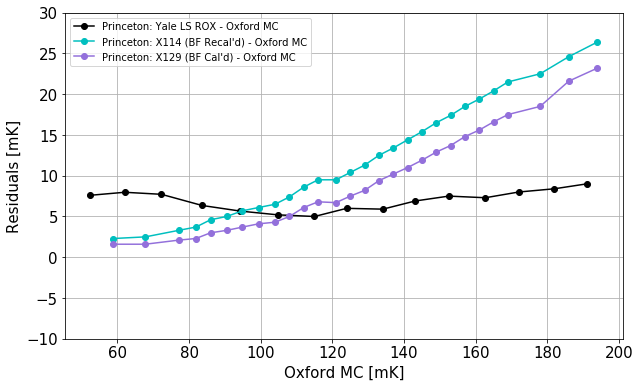

In [37]:
plt.plot(oxford_lscal, ls_cal_pton-oxford_lscal, 'o-', color = 'k', label = "Princeton: Yale LS ROX - Oxford MC")
plt.plot(oxford,x003_pton-oxford, 'o-', color = 'b', label = "Princeton: X003 (LS Cal'd) - Oxford MC")
plt.plot(oxford_x114, x114_pton-oxford_x114, 'o-', color = 'c', label = "Princeton: X114 (BF Recal'd) - Oxford MC")
plt.plot(oxford_x114, x114_LS_temps-oxford_x114, 'o-', color = 'r', label = "Princeton: X114 LS Cal - Oxford MC")
plt.plot(oxford, x129_pton-oxford, 'o-', color = 'mediumpurple', label = "Princeton: X129 (BF Cal'd) - Oxford MC")
#plt.plot(oxford, x129_lstemps-oxford, 'o-', color = 'darkkhaki', label = "Princeton: X129 (LS Cal'd) - Oxford MC")
plt.grid()
plt.xlabel('Oxford MC [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 10)

print(np.average(ls_cal_pton-oxford_lscal))

____________________________________________________________________________________________

## UCSD Data [X-002, X-020]

In [28]:
## X-020 BF Recal'd
ucsd_bf = [48, 54.7,61.9,66.2,71.3,77.5,82.3,85,89.2,93.3,100.5,102.7,104.7,108.1,115.5,117.3,119.1,121.3,124.2] #[48
x020_ucsd = [58.1, 66.3,73,79.3,85.1,90.6,95.9,100.8,105.6,110.2,114.6,118.8,123,127,131.1,134.8,138.5,141.9,145.2] #[58.1

#X-020 LS Cal (using Slope fit)
x020_lstemps = []
for i in range(0, len(x020_ucsd)):
    lstemps = lsbf_slopefit[0]*x020_ucsd[i] + lsbf_slopefit[1]
    x020_lstemps.append(lstemps)

## X-002 (LS Cal'd)
#got data points from averaging stepped data from aug 2019 k2so data on simons1
x002_ucsd = [116, 121.5, 126.8, 132.1,137.5,142.9,148.4, 153.7,159,164.3,169.5, 174.9, 180.3, 185.7, 191.1, 196.4, 201.9]# 207.3]
x002_ucsd_bf = [114.9, 119.9, 124.9, 130.1, 135.3, 140.4, 144.9, 149.9, 154.4, 159.5, 165.6, 169.8, 174.9, 180, 185.2, 189.9, 194.9]

## X-002 (BF Recal'd)
x002res = [16621.7, 15657.7,14807.2, 14046.7, 13364.8, 12749.2, 12190.7, 11683.7, 11224.7, 10810.7, 10422.9, 10061.2, 9725.1, 9412.1, 9119.5, 8847.2, 8591.2]
x002_bf_curve = '/home/sab267/git/thermometer-calibrations/simons/rox/X-002_BF_corr.cal'
x002_BF_temps = 1000*resistance2temperature(x002_bf_curve, x002res)

## X-002 Standard Curve
x002_standard_temps = 1000*resistance2temperature(standard_curve, x002res)

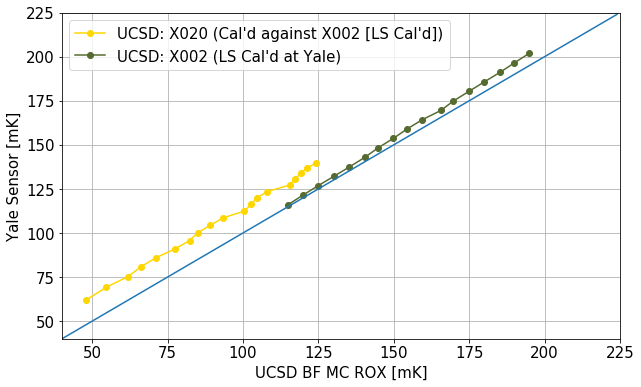

In [35]:
#plt.plot(ucsd_bf, x020_ucsd, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd)")
plt.plot(ucsd_bf, x020_lstemps, 'o-', color = 'gold', label = "UCSD: X020 (Cal'd against X002 [LS Cal'd])")
plt.plot(x002_ucsd_bf, x002_ucsd, 'o-', color = 'darkolivegreen', label = "UCSD: X002 (LS Cal'd at Yale)")
#plt.plot(x002_ucsd_bf, x002_BF_temps, 'o-', color = 'mediumaquamarine', label = "UCSD: X002 (BF Recal'd)")
plt.xlim(40,225)
plt.ylim(40,225)
plt.grid()
plt.plot(x,x)
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('UCSD BF MC ROX [mK]')
plt.legend(loc = 'best')

In [30]:
x020_ucsd = np.array(x020_ucsd)
x002_ucsd_bf = np.array(x002_ucsd_bf)
ucsd_bf = np.array(ucsd_bf)
x002_BF_temps = np.array(x002_BF_temps)
x020_lstemps = np.array(x020_lstemps)

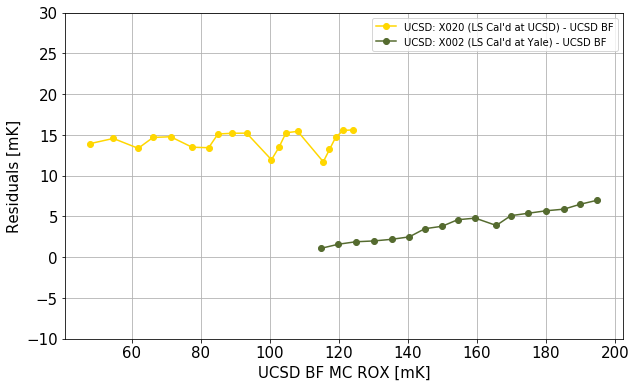

In [36]:
#plt.plot(ucsd_bf, x020_ucsd-ucsd_bf, 'o-', color = 'g', label = "UCSD: X020 (BF Recal'd) - UCSD BF")
#plt.plot(x002_ucsd_bf, x002_BF_temps-x002_ucsd_bf, 'o-', color = 'mediumaquamarine', label = "UCSD: X002 (BF Recal'd) - UCSD BF")
plt.plot(ucsd_bf, x020_lstemps-ucsd_bf, 'o-', color = 'gold', label = "UCSD: X020 (LS Cal'd at UCSD) - UCSD BF")
plt.plot(x002_ucsd_bf, x002_ucsd-x002_ucsd_bf, 'o-', color = 'darkolivegreen', label = "UCSD: X002 (LS Cal'd at Yale) - UCSD BF")
plt.grid()
plt.xlabel('UCSD BF MC ROX [mK]')
plt.ylabel('Residuals [mK]')
plt.ylim(-10, 30)
plt.legend(loc = 'best', fontsize = 10)

## Penn Data [X-040, X-147]; X-040 was BF calibrated

In [13]:
#cooldown data
ls_penn_x147 = [186.5,165.6,150.2,135.2,116.8,105,96.3,87.1,80.5,75.6,72.2,69,67.2,64.1,59.7,57.1,54.2,50.8,50,48.4]
x040_penn = [201.4,177,159.3,142.3,121.7,108.7,98.1,90.1,83.3,77.4,74.2,71.9,69.7,67.5,63.4,61.2,58.6,56.2,55.5,54]

#x040 servo data 
ls_penn_x147_servo = [45.6, 102.8, 115.8, 127.2, 136.2, 147, 157.7, 174, 184.8]
x040_penn_servo = [51.9, 103.5, 117.2, 129.6, 139.8, 151.9, 164.5, 183.5, 196]

#X-040 BF temps converted to LS temps using slopefit
x040_lstemps = [] #cooldown 
for i in range(0, len(x040_penn)):
    lstemps = lsbf_slopefit[0]*x040_penn[i] + lsbf_slopefit[1]
    x040_lstemps.append(lstemps)
    
#X-040 LS temps for servo
x040_lstemps_servo = [] #cooldown 
for i in range(0, len(x040_penn_servo)):
    lstemps_servo = lsbf_slopefit[0]*x040_penn_servo[i] + lsbf_slopefit[1]
    x040_lstemps_servo.append(lstemps_servo)

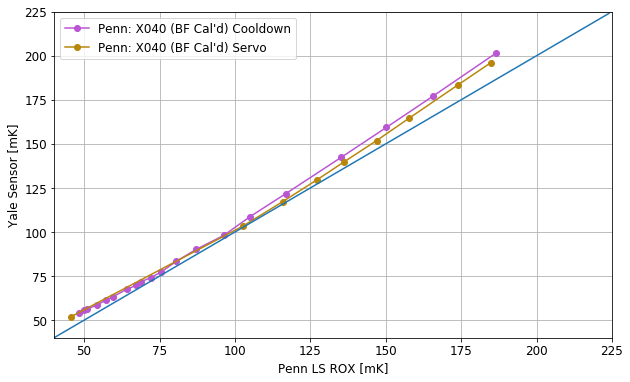

In [14]:
plt.plot(ls_penn_x147, x040_penn, 'o-', color = 'mediumorchid',label = "Penn: X040 (BF Cal'd) Cooldown")
plt.plot(ls_penn_x147_servo, x040_penn_servo, 'o-', color = 'darkgoldenrod', label = "Penn: X040 (BF Cal'd) Servo")
#plt.plot(ls_penn_x147, x040_lstemps, 'o-', color = 'sandybrown', label = "Penn: X040 (LS Cal'd) Cooldown")
#plt.plot(ls_penn_x147_servo, x040_lstemps_servo, 'o-', color = 'm', label = "Penn: X040 (LS Cal'd) Servo")
plt.xlim(40,225)
plt.ylim(40,225)
plt.grid()
plt.plot(x,x)
plt.ylabel('Yale Sensor [mK]')
plt.xlabel('Penn LS ROX [mK]')
plt.legend(loc = 'best')

In [15]:
ls_penn_x147 = np.array(ls_penn_x147)
ls_penn_x147_servo = np.array(ls_penn_x147_servo)
x040_penn = np.array(x040_penn)
x040_penn_servo = np.array(x040_penn_servo)

(-10, 20)

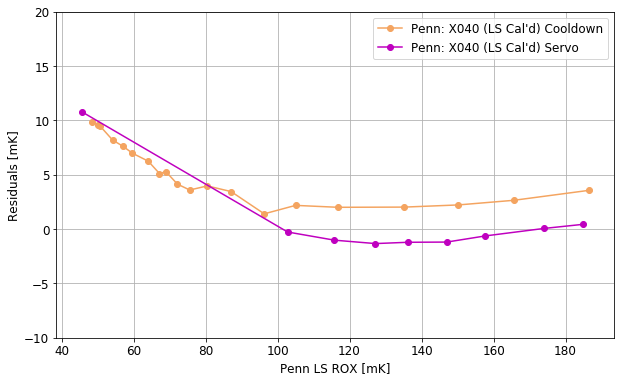

In [16]:
#plt.plot(ls_penn_x147, x040_penn-ls_penn_x147, 'o-', color = 'mediumorchid',label = "Penn: X040 (BF Cal'd) & LS ROX Cooldown")
#plt.plot(ls_penn_x147_servo, x040_penn_servo-ls_penn_x147_servo, 'o-', color = 'darkgoldenrod', label = "Penn: X040 (BF Cal'd) & LS ROX Servo")
plt.plot(ls_penn_x147, x040_lstemps-ls_penn_x147, 'o-', color = 'sandybrown', label = "Penn: X040 (LS Cal'd) Cooldown")
plt.plot(ls_penn_x147_servo, x040_lstemps_servo-ls_penn_x147_servo, 'o-', color = 'm', label = "Penn: X040 (LS Cal'd) Servo")
plt.grid()
#plt.plot(x,x)
plt.ylabel('Residuals [mK]')
plt.xlabel('Penn LS ROX [mK]')
plt.legend(loc = 'best')
plt.ylim(-10, 20)
#y = np.zeros(200)
#plt.plot(y, '--', color = 'k')
#plt.xlim(30,200)